In [67]:
!pip install category_encoders

In [68]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [69]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
#check data shape
df.shape

(614, 13)

In [71]:
#check metadata of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Total data point 614  
no of columns 13  
float data type feature 4  
int64 data type feature 1  
object data type feature 8  
No of features that has null values 7

In [72]:
#deleting unwanted colums
df.drop('Loan_ID',axis=1,inplace=True)

In [73]:
#check null values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
#check value count of individual features
for i in df.columns:
  print('\n','-'*10,i,'-'*10)
  print(df[i].value_counts())


 ---------- Gender ----------
Male      489
Female    112
Name: Gender, dtype: int64

 ---------- Married ----------
Yes    398
No     213
Name: Married, dtype: int64

 ---------- Dependents ----------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 ---------- Education ----------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 ---------- Self_Employed ----------
No     500
Yes     82
Name: Self_Employed, dtype: int64

 ---------- ApplicantIncome ----------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

 ---------- CoapplicantIncome ----------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

 ---------- LoanAmount ----------
120.0    20
110.0    17
100.0    15
160.0    12

In [75]:
#listing null values features
nan_f=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

<AxesSubplot:xlabel='Gender', ylabel='count'>

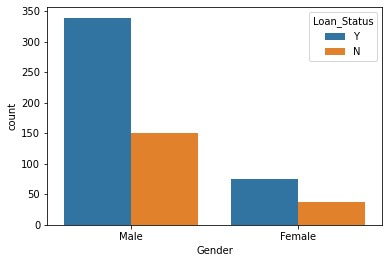

In [76]:
#check count of gender feature how many male and females are applying for loan
sns.countplot(data=df,x=df['Gender'],hue=df['Loan_Status'])

as compate to female male's are applying more.

<AxesSubplot:xlabel='Married', ylabel='count'>

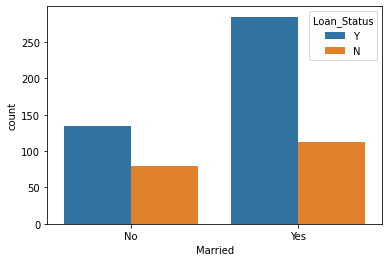

In [77]:
#check count of Married feature
sns.countplot(data=df,x=df['Married'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

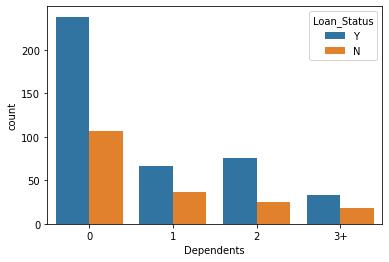

In [78]:

#check count of Dependents feature
sns.countplot(data=df,x=df['Dependents'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

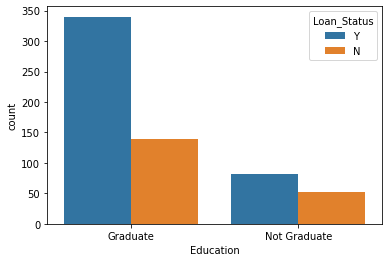

In [79]:
#check count of Education feature
sns.countplot(data=df,x=df['Education'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

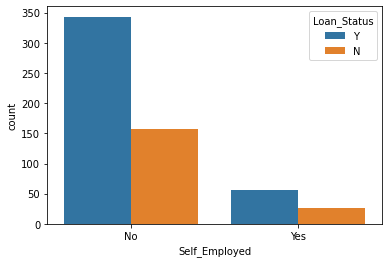

In [80]:
#check count of Self_Employed feature
sns.countplot(data=df,x=df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

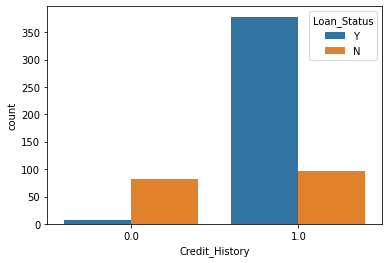

In [81]:
#check count of Credit_History feature
sns.countplot(data=df,x=df['Credit_History'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

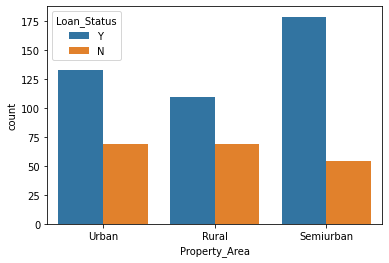

In [82]:
#check count of Property_Area feature
sns.countplot(data=df,x=df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

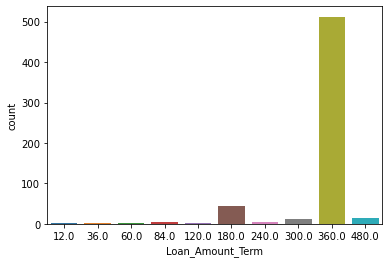

In [83]:
#check count of Loan_Status feature
sns.countplot(data=df,x=df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

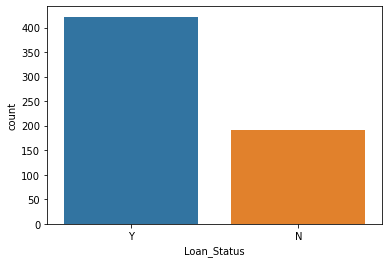

In [84]:
#check count of Loan_Status feature
sns.countplot(data=df,x=df['Loan_Status'])

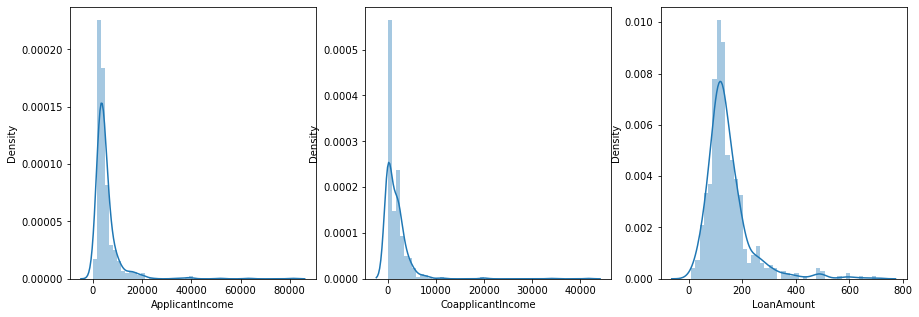

In [85]:
#plote distribution of continuos features
plt.figure(figsize=(15,5))
plotno=1
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
  plt.subplot(1,3,plotno)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

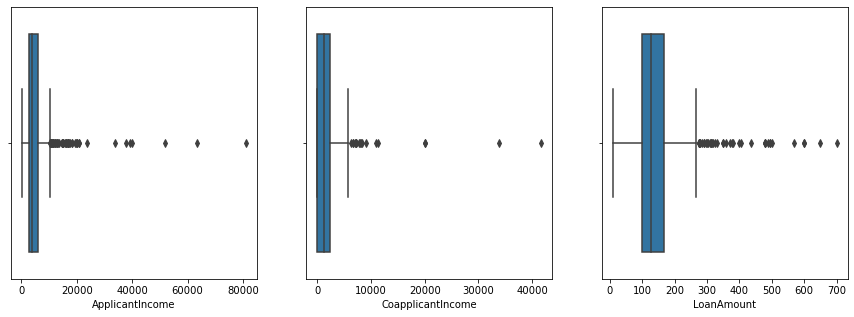

In [86]:
#check outliers of continuos features
plt.figure(figsize=(15,5))
plotno=1
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
  plt.subplot(1,3,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

In [87]:
#filling null values of features
df['Gender'].fillna( df['Gender'].mode()[0], inplace=True ) #mode Male
df['Married'].fillna(df['Married'].mode()[0],inplace=True) #Mode Yes
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)  #mode 0
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)  #mode No
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True) #mean 140, median 128, mode 120
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True) #mean 342, mode 360   median 360
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) #mean 0.84.  median 1.0. mode 1.0

In [88]:
#feature encoding
binary_f=['Gender','Married','Self_Employed','Education','Property_Area']
bin_encoded_data=pd.get_dummies(df[binary_f],drop_first=True)
df=pd.concat([df,bin_encoded_data],axis=1)
df['Loan_Status']=LabelEncoder().fit_transform(df['Loan_Status'])

In [89]:
df['Dependents']=df['Dependents'].apply(lambda x:3 if x=='3+' else x )
df['Dependents']=df['Dependents'].astype(int)

In [90]:
#deleting the enoded old features
df.drop(columns=binary_f,axis=1,inplace=True)

In [91]:
df.skew()

Dependents                 1.015551
ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Loan_Status               -0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Self_Employed_Yes          2.159796
Education_Not Graduate     1.367622
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

In [92]:
#seprate feature and label
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [93]:
#cehck multicollinearity
vif=pd.DataFrame()
vif['feature']=X.columns
vif['Score']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,feature,Score
0,Dependents,1.792874
1,ApplicantIncome,2.888229
2,CoapplicantIncome,1.482204
3,LoanAmount,6.803376
4,Loan_Amount_Term,10.835464
5,Credit_History,6.093705
6,Gender_Male,6.054595
7,Married_Yes,3.666740
8,Self_Employed_Yes,1.176917
9,Education_Not Graduate,1.306957


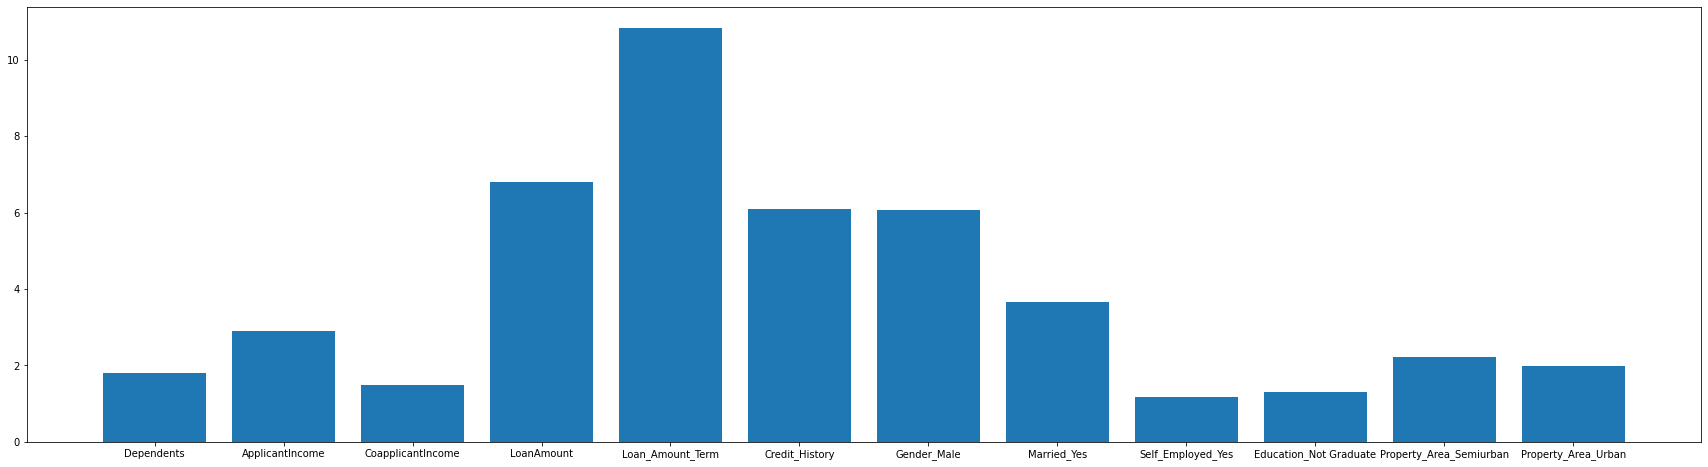

In [94]:
plt.figure(figsize=(30,8))
plt.bar(vif['feature'],vif['Score'])
plt.show()

In [95]:
y.unique()

array([1, 0])

In [96]:
# X.drop('Loan_Amount_Term',axis=1,inplace=True)

In [97]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(X,y)

In [98]:
for i in x_resampled.columns:
  if x_resampled[i].skew() < 0.5:
    x_resampled[i]=np.sqrt(x_resampled[i])
  elif X[i].skew() > 0.5:
    x_resampled[i]=np.cbrt(x_resampled[i])

In [99]:
#normalizing scal or unit of features
scal=StandardScaler()
x_scal=scal.fit_transform(x_resampled)

In [100]:
maxscore=0
ind=0
for i in range(100):
  x_tr,x_te,y_tr,y_te=train_test_split(x_scal,y_resampled,test_size=0.20,random_state=i)
  lc=LogisticRegression()
  lc.fit(x_tr,y_tr)
  y_pred=lc.predict(x_te)
  score=0
  score=accuracy_score(y_te,y_pred)
  if maxscore < score:
    maxscore=score
    ind=i
print(f'MaxScore {maxscore} at random state {ind}')

MaxScore 0.8520710059171598 at random state 9


In [101]:
#define function for training/building midel
def build_model(alg,f_train,f_test,l_train,l_test):
  alg.fit(f_train,l_train)
  print('-'*15,'Training Score','-'*15)
  training_pred=alg.predict(f_train)
  training_score=accuracy_score(l_train,training_pred)
  print(training_score)
  print('-'*15,'Testing Score','-'*15)
  testing_pred=alg.predict(f_test)
  testing_score=accuracy_score(l_test,testing_pred)
  print(testing_score)
  print('-'*15,'Confusion Matrix','-'*15)
  print(confusion_matrix(l_test,testing_pred))
  return alg,testing_score

In [102]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y_resampled,test_size=0.20,random_state=ind)

In [103]:
#building LogisticRegression
lc,lc_score=build_model(LogisticRegression(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.7777777777777778
--------------- Testing Score ---------------
0.8520710059171598
--------------- Confusion Matrix ---------------
[[61 18]
 [ 7 83]]


In [104]:
#building svc
svc,svc_score=build_model(SVC(probability=True),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8162962962962963
--------------- Testing Score ---------------
0.8047337278106509
--------------- Confusion Matrix ---------------
[[53 26]
 [ 7 83]]


In [105]:
#building kneighborsregressor
kn,knc_score=build_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8177777777777778
--------------- Testing Score ---------------
0.7869822485207101
--------------- Confusion Matrix ---------------
[[56 23]
 [13 77]]


In [106]:
#building DecisionTreeClassifier
dt,dt_score=build_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.7396449704142012
--------------- Confusion Matrix ---------------
[[58 21]
 [23 67]]


In [107]:
#building ExtraTreeClassifier
et,et_score=build_model(ExtraTreeClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.7692307692307693
--------------- Confusion Matrix ---------------
[[60 19]
 [20 70]]


In [108]:
#building RandomForestCLassifier
rfc,rfc_score=build_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.8698224852071006
--------------- Confusion Matrix ---------------
[[63 16]
 [ 6 84]]


In [109]:
#building AdaBoostClassifier
adc,adc_score=build_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.8503703703703703
--------------- Testing Score ---------------
0.7810650887573964
--------------- Confusion Matrix ---------------
[[59 20]
 [17 73]]


In [110]:
#building GradientBoostinhClassifier
gbc,gbc_score=build_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9022222222222223
--------------- Testing Score ---------------
0.8284023668639053
--------------- Confusion Matrix ---------------
[[61 18]
 [11 79]]


In [111]:
#building xgbclassifier
xgb,xgb_score=build_model(XGBClassifier(probability=True),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.8579881656804734
--------------- Confusion Matrix ---------------
[[66 13]
 [11 79]]


In [112]:
#cross validation
def cross_check(ml_alg,c_train,c_test,test_score):
    cv=cross_val_score(ml_alg,c_train,c_test)
    cv_mean=cv.mean()
    print(cv)
    print('\n   cv mean     testing score     difference')
    print(f'    {round(cv_mean,2)*100}          {round(test_score,2)*100}             {round((cv_mean - test_score),2)*100}')

In [113]:
#cross validation of LogisticRegression
cross_check(LogisticRegression(),x_train,y_train,lc_score)

[0.75555556 0.79259259 0.76296296 0.74814815 0.77037037]

   cv mean     testing score     difference
    77.0          85.0             -9.0


In [114]:
#cross validation of svc
cross_check(SVC(),x_train,y_train,svc_score)

[0.77037037 0.77777778 0.75555556 0.77037037 0.76296296]

   cv mean     testing score     difference
    77.0          80.0             -4.0


In [115]:
#cross validation of KNeighborsRegressor
cross_check(KNeighborsClassifier(),x_train,y_train,knc_score)

[0.76296296 0.73333333 0.65925926 0.71111111 0.67407407]

   cv mean     testing score     difference
    71.0          79.0             -8.0


In [116]:
#cross validation of DecisionTreeClassifier
cross_check(DecisionTreeClassifier(),x_train,y_train,dt_score)

[0.75555556 0.74814815 0.74814815 0.74074074 0.79259259]

   cv mean     testing score     difference
    76.0          74.0             2.0


In [117]:
#cross validation of ExtraTreeClassifier
cross_check(ExtraTreeClassifier(),x_train,y_train,et_score)

[0.71111111 0.8        0.74074074 0.80740741 0.67407407]

   cv mean     testing score     difference
    75.0          77.0             -2.0


In [118]:
#cross validation of RandomForestClassifier
cross_check(RandomForestClassifier(),x_train,y_train,rfc_score)

[0.81481481 0.80740741 0.82222222 0.84444444 0.83703704]

   cv mean     testing score     difference
    83.0          87.0             -4.0


In [119]:
#cross validation of AdaBoostClassifier
cross_check(AdaBoostClassifier(),x_train,y_train,adc_score)

[0.77777778 0.79259259 0.82962963 0.75555556 0.82222222]

   cv mean     testing score     difference
    80.0          78.0             1.0


In [120]:
#cross validation of GradientBoostingClassifier
cross_check(GradientBoostingClassifier(),x_train,y_train,gbc_score)

[0.80740741 0.79259259 0.78518519 0.82962963 0.8       ]

   cv mean     testing score     difference
    80.0          83.0             -3.0


In [121]:
#cross validation of XGBClassifier
cross_check(XGBClassifier(),x_train,y_train,xgb_score)

[0.8        0.77037037 0.74074074 0.83703704 0.82222222]

   cv mean     testing score     difference
    79.0          86.0             -6.0


In [122]:
#predict probabilites
lc_prob=lc.predict_proba(x_test)
svc_prob=svc.predict_proba(x_test)
kn_prob=kn.predict_proba(x_test)
dt_prob=dt.predict_proba(x_test)
et_prob=et.predict_proba(x_test)
rfc_prob=rfc.predict_proba(x_test)
adc_prob=adc.predict_proba(x_test)
gbc_prob=gbc.predict_proba(x_test)
xgb_prob=xgb.predict_proba(x_test)

In [123]:
lc_prob=lc_prob[:,1]
svc_prob=svc_prob[:,1]
kn_prob=kn_prob[:,1]
dt_prob=dt_prob[:,1]
et_prob=et_prob[:,1]
rfc_prob=rfc_prob[:,1]
adc_prob=adc_prob[:,1]
gbc_prob=gbc_prob[:,1]
xgb_prob=xgb_prob[:,1]

In [124]:
#get roc auc score
lc_auc=roc_auc_score(y_test,lc_prob)
svc_auc=roc_auc_score(y_test,svc_prob)
kn_auc=roc_auc_score(y_test,kn_prob)
dt_auc=roc_auc_score(y_test,dt_prob)
et_auc=roc_auc_score(y_test,et_prob)
rfc_auc=roc_auc_score(y_test,rfc_prob)
adc_auc=roc_auc_score(y_test,adc_prob)
gbc_auc=roc_auc_score(y_test,gbc_prob)
xgb_auc=roc_auc_score(y_test,xgb_prob)

In [125]:
print('LogisticRegression roc auc score: % 0.2f' % lc_auc)
print('SVC roc auc score: % 0.2f' % svc_auc)
print('KNeighborsClassifier roc auc score: % 0.2f' % kn_auc)
print('DecisionTreeClassifier roc auc score: % 0.2f' % dt_auc)
print('ExtraTreeClassifier roc auc score: % 0.2f' % et_auc)
print('RandomForestClassifier roc auc score: % 0.2f' % rfc_auc)
print('AdaBoostClassifier roc auc score: % 0.2f' % adc_auc)
print('GradientBoostingClassifier roc auc score: % 0.2f' % gbc_auc)
print('XGBClassifier roc auc score: % 0.2f' % xgb_auc)

LogisticRegression roc auc score:  0.90
SVC roc auc score:  0.89
KNeighborsClassifier roc auc score:  0.87
DecisionTreeClassifier roc auc score:  0.74
ExtraTreeClassifier roc auc score:  0.77
RandomForestClassifier roc auc score:  0.92
AdaBoostClassifier roc auc score:  0.85
GradientBoostingClassifier roc auc score:  0.92
XGBClassifier roc auc score:  0.92


In [126]:
#get fpr,tpr and threshold
lc_auc_score =roc_curve(y_test,lc_prob)
svc_auc_score =roc_curve(y_test,svc_prob)
kn_auc_score =roc_curve(y_test,kn_prob)
dt_auc_score =roc_curve(y_test,dt_prob)
et_auc_score =roc_curve(y_test,et_prob)
rfc_auc_score =roc_curve(y_test,rfc_prob)
adc_auc_score =roc_curve(y_test,adc_prob)
gbc_auc_score =roc_curve(y_test,gbc_prob)
xgb_auc_score =roc_curve(y_test,xgb_prob)

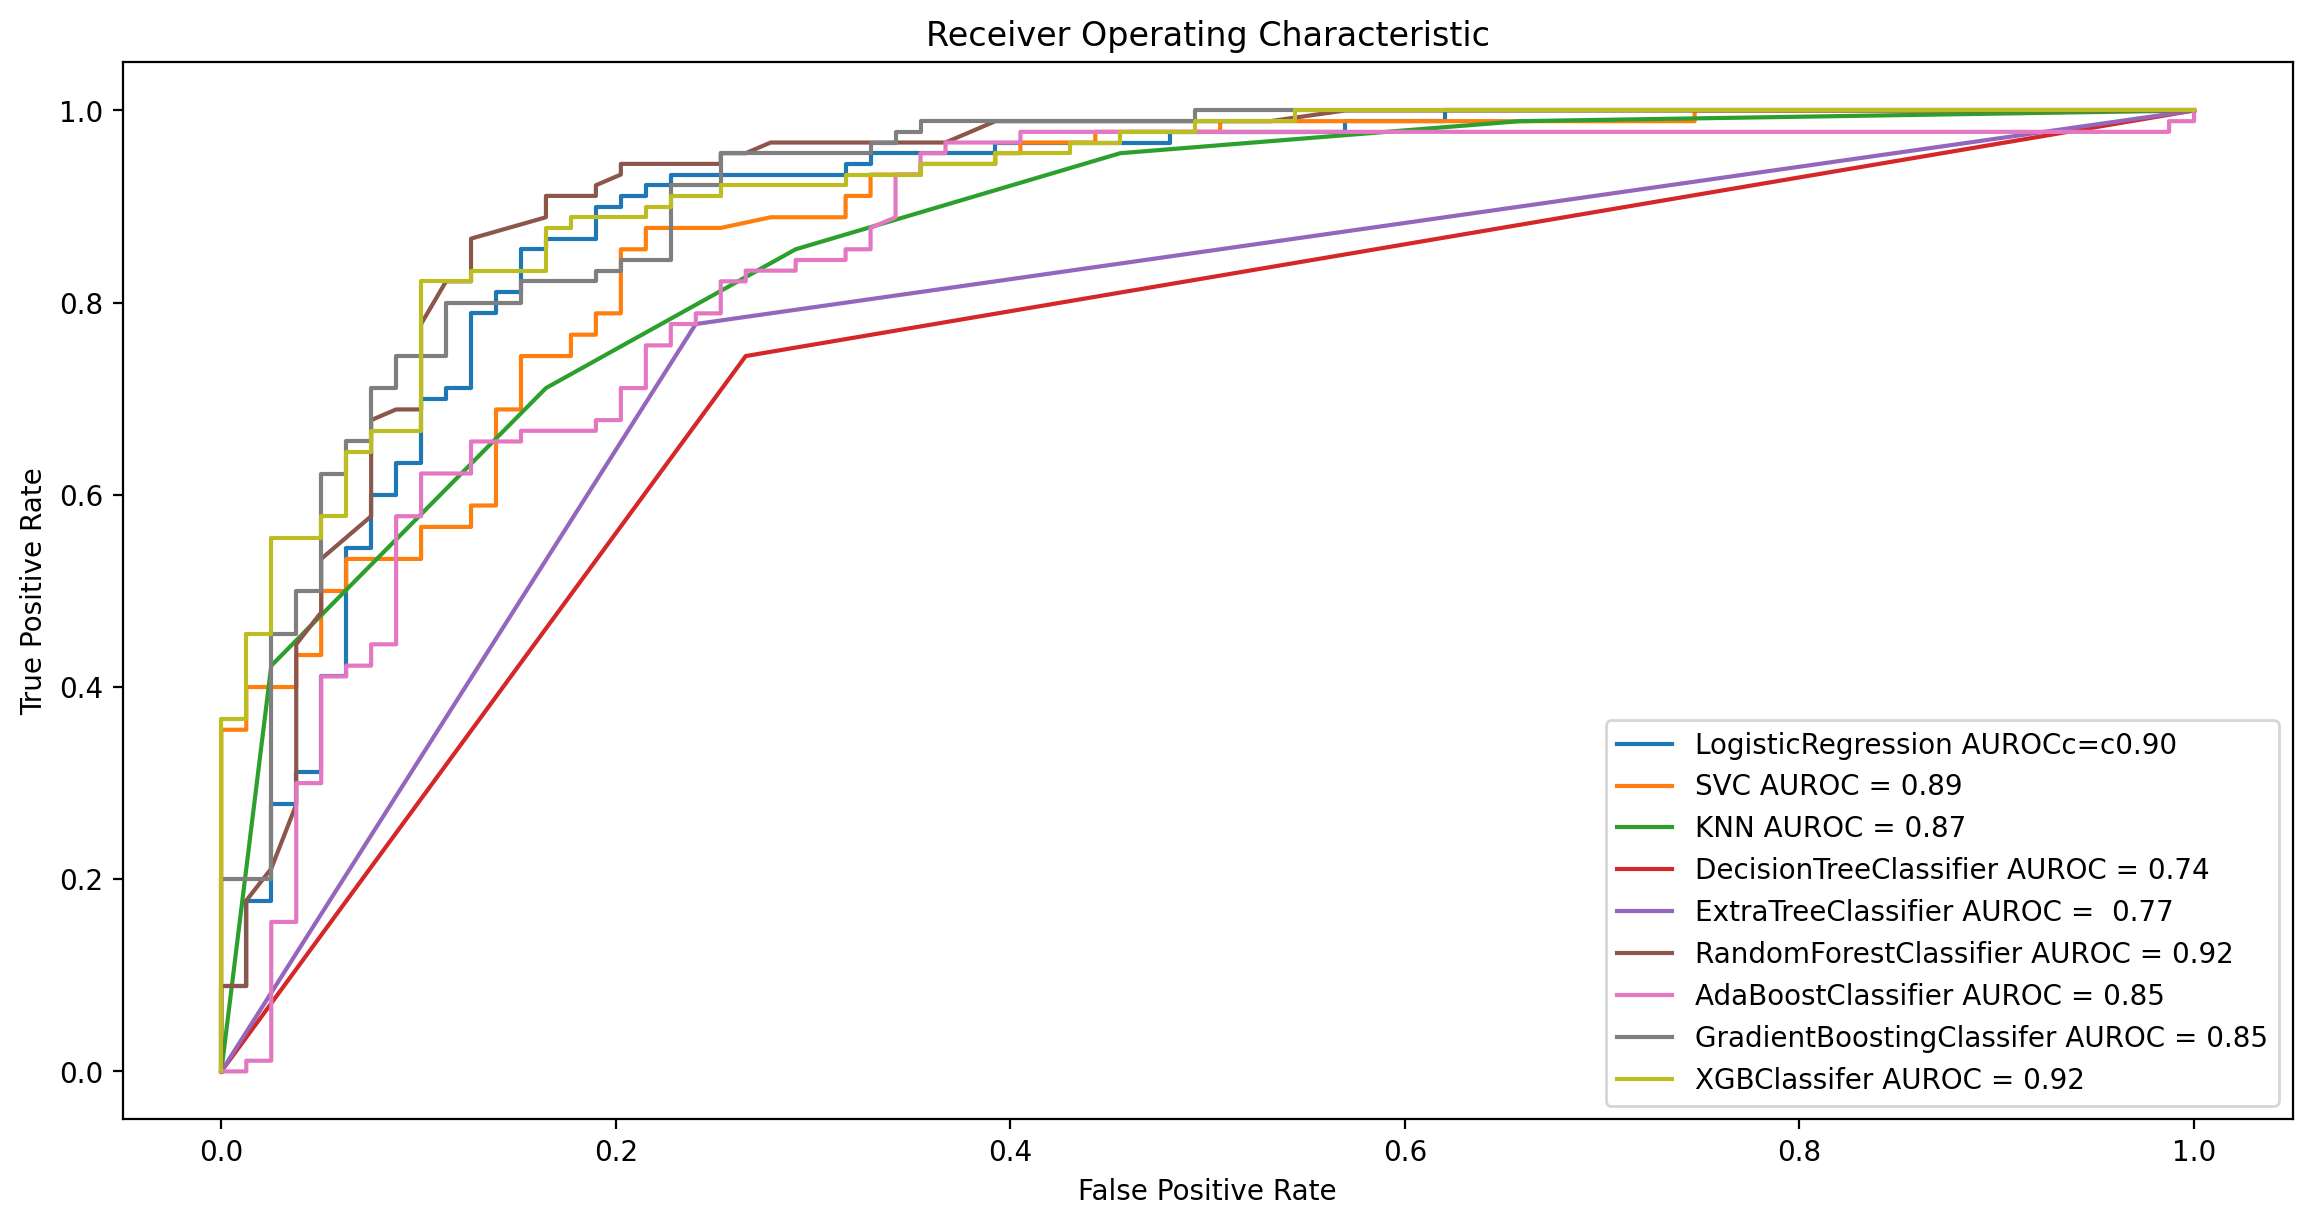

In [127]:
#ploting area under the roc
plt.figure(figsize=(14,7),dpi=200)
plt.plot(lc_auc_score[0],lc_auc_score[1],label='LogisticRegression AUROCc=c%.2f'%lc_auc)
plt.plot(svc_auc_score[0],svc_auc_score[1],label='SVC AUROC = %.2f'%svc_auc)
plt.plot(kn_auc_score[0],kn_auc_score[1],label='KNN AUROC = %.2f' % kn_auc)
plt.plot(dt_auc_score[0],dt_auc_score[1],label='DecisionTreeClassifier AUROC = %.2f' % dt_auc)
plt.plot(et_auc_score[0],et_auc_score[1],label='ExtraTreeClassifier AUROC = % .2f' % et_auc)
plt.plot(rfc_auc_score[0],rfc_auc_score[1],label='RandomForestClassifier AUROC = %.2f' % rfc_auc)
plt.plot(adc_auc_score[0],adc_auc_score[1],label='AdaBoostClassifier AUROC = %.2f' % adc_auc)
plt.plot(gbc_auc_score[0],gbc_auc_score[1],label='GradientBoostingClassifer AUROC = %.2f' % adc_auc)
plt.plot(xgb_auc_score[0],xgb_auc_score[1],label='XGBClassifer AUROC = %.2f' % xgb_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

According to evaluation I am gonna pick XGBClassifer and RandomForestClassifier as it is well generalized and covering area under the curve is highest, bsaed on tpr and fpr i'll select final model after tunning

In [128]:
# #parameter tunning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],

# }
# grid_search=GridSearchCV(XGBClassifier(),param_grid=param_grid)
# grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                    

In [129]:
# grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [135]:
# #training xgb with tunned parameters
# tunned_xgb,tune_xgb_score=build_model(XGBClassifier(learning_rate=0.2,max_depth=5,n_estimators=100),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
0.9925925925925926
--------------- Testing Score ---------------
0.8402366863905325
--------------- Confusion Matrix ---------------
[[63 16]
 [11 79]]


In [137]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}
grid_search2=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search2.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [138]:
grid_search2.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [153]:
tunned_rfc,tune_rfc_score=build_model(RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=None,class_weight=None,bootstrap=True),x_train,x_test,y_train,y_test)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.8461538461538461
--------------- Confusion Matrix ---------------
[[62 17]
 [ 9 81]]


In [154]:
#saving model
import pickle as pkl
pkl.dump(tunned_rfc,open('loan_file_status_rfc.sav','wb'))

In [155]:
#loading model
model=pkl.load(open('loan_file_status_rfc.sav','rb'))

In [156]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['Org_loan_status']=y_test
cmp_df['Pred_loan_status']=model.predict(x_test)
cmp_df

,Org_loan_status,Pred_loan_status
30,0,1
299,0,1
841,0,0
132,1,1
345,1,1
...,...,...
259,0,1
529,1,1
27,1,1
707,0,0
